In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

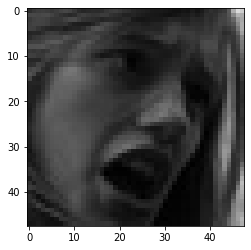

In [ ]:
Datadirectory = "/content/drive/MyDrive/summer-intern/data/train"
classes = ["0" , "1" , "2" , "3" ,"4" , "5" , "6"]
for category in classes :
    path = os.path.join( Datadirectory , category)
    for img in os.listdir ( path ):
        img_array =cv2.imread(os.path.join (path, img))
        plt.imshow (cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        

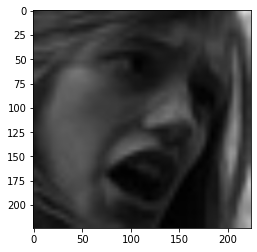

In [ ]:
img_size=224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow (cv2.cvtColor(new_array , cv2.COLOR_BGR2RGB))



In [ ]:
training_data =[]
def create_training_data():
    for category in classes:
        path = os.path.join(Datadirectory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize( img_array ,(img_size, img_size))
                training_data.append([new_array , class_num])
            except Exception as e:
                pass
            

In [ ]:
create_training_data()
temp= np.array(training_data)
print(len(training_data))

1429


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
import random
import numpy as np

random.shuffle(training_data)




In [ ]:
X=[]
y=[]
for features ,label in training_data:
    X.append(features)
    y.append(label)
X= np.array(X).reshape(-1, img_size, img_size, 3)
X= X/255.0
Y= np.array(y)

In [ ]:
model= tf.keras.applications.MobileNetV2()
base_input= model.layers[0].input
base_output= model.layers[-2].output



In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
final_output= layers.Dense(128)(base_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(64)(final_output)
final_output=layers.Dense(7, activation= 'softmax')(final_output)

In [ ]:
new_model= keras.Model(inputs = base_input, outputs = final_output)



In [ ]:
new_model.compile( loss= "sparse_categorical_crossentropy", optimizer="adam",  metrics = ['accuracy'])


In [ ]:
new_model.fit (X, Y, epochs = 25)
new_model.save('final_model_95p07.h5')


Epoch 1/25
45/45 [==============================] - 253s 6s/step - loss: 0.1662 - accuracy: 0.9496
Epoch 2/25
45/45 [==============================] - 252s 6s/step - loss: 0.1703 - accuracy: 0.9419
Epoch 3/25
45/45 [==============================] - 249s 6s/step - loss: 0.1501 - accuracy: 0.9496
Epoch 4/25
45/45 [==============================] - 248s 6s/step - loss: 0.1715 - accuracy: 0.9391
Epoch 5/25
45/45 [==============================] - 247s 5s/step - loss: 0.1655 - accuracy: 0.9482
Epoch 6/25
45/45 [==============================] - 248s 6s/step - loss: 0.1172 - accuracy: 0.9608
Epoch 7/25
45/45 [==============================] - 247s 5s/step - loss: 0.1202 - accuracy: 0.9629
Epoch 8/25
45/45 [==============================] - 249s 6s/step - loss: 0.1189 - accuracy: 0.9636
Epoch 9/25
45/45 [==============================] - 249s 6s/step - loss: 0.1077 - accuracy: 0.9643
Epoch 10/25
45/45 [==============================] - 249s 6s/step - loss: 0.1419 - accuracy: 0.9524
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [2]:
new_model = tf.keras.models.load_model('/content/sample_data/final_model_95p07.h5')

In [4]:
!pip install deepface


     |████████████████████████████████| 61 kB 5.4 MB/s 
     |████████████████████████████████| 2.3 MB 15.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.13.0-py3-none-any.whl size=9046 sha256=1c64c3d2e2674e0fb9d425e14e35b32c9c6c1c14d2cf3e3652de4ca0d64cadf5
  Stored in directory: /root/.cache/pip/wheels/2f/2a/2f/86449b6bdbaa9aef873f68332b68be6bfbc386b9219f47157d
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [5]:
import cv2
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [6]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [7]:
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [8]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
    
    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray , 1.1 , 4)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)
      roi_gray= gray[y:y+h , x: x+w]
      roi_color = img[y:y+h, x:x+w]
      facess = face_cascade.detectMultiScale(roi_gray)
      for (ex, ey, ew, eh) in facess:
        face_roi= roi_color[ey:ey +eh, ex:ex +ew]
      final_image = cv2.resize(face_roi , (224, 224))
      final_image = np.expand_dims(final_image, axis =0 )
      final_image = final_image/255.0
      font = cv2.FONT_HERSHEY_SIMPLEX
      Predictions = new_model.predict(final_image)

      font_scale= 1.5
      font = cv2.FONT_HERSHEY_PLAIN  
      maxindex = int(np.argmax(Predictions))
      if (maxindex ==0):
        status = "Angry"
        x1, y1, w1, h1= 0 , 0 , 175 ,175
        cv2.rectangle(bbox_array, (x1,x1), (x1 +w1, y1+h1), (0,0,0), -1)
        cv2.putText(bbox_array,status, (x1 +int(x1/10),y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,225),2)
        
        cv2.rectangle( bbox_array, (x,y ), (x+w,y+h),(0,0,225) )
      elif (maxindex ==1):
        status = "Disgust"
        x1, y1, w1, h1= 0 , 0 , 175 ,175
        cv2.rectangle(bbox_array, (x1,x1), (x1 +w1, y1+h1), (0,0,0), -1)
        cv2.putText(bbox_array,status, (x1 +int(x1/10),y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,225),2)
        
        cv2.rectangle( bbox_array, (x,y ), (x+w,y+h),(0,0,225) )
      elif (maxindex ==2):
        status = "Fear"
        x1, y1, w1, h1= 0 , 0 , 175 ,175
        cv2.rectangle(bbox_array, (x1,x1), (x1 +w1, y1+h1), (0,0,0), -1)
        cv2.putText(bbox_array,status, (x1 +int(x1/10),y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,225),2)
        
        cv2.rectangle( bbox_array, (x,y ), (x+w,y+h),(0,0,225) )
      elif (maxindex==3):
        status = "Happy"
        x1, y1, w1, h1= 0 , 0 , 175 ,175
        cv2.rectangle(bbox_array, (x1,x1), (x1 +w1, y1+h1), (0,0,0), -1)
        cv2.putText(bbox_array,status, (x1 +int(x1/10),y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,225),2)
        
        cv2.rectangle( bbox_array, (x,y ), (x+w,y+h),(0,0,225) )
      elif (maxindex==5):
        status = "sad"
        x1, y1, w1, h1= 0 , 0 , 175 ,175
        cv2.rectangle(bbox_array, (x1,x1), (x1 +w1, y1+h1), (0,0,0), -1)
        cv2.putText(bbox_array,status, (x1 +int(x1/10),y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,225),2)
        
        cv2.rectangle( bbox_array, (x,y ), (x+w,y+h),(0,0,225) )
      elif (maxindex ==6):
        status = "Surprise"
        x1, y1, w1, h1= 0 , 0 , 175 ,175
        cv2.rectangle(bbox_array, (x1,x1), (x1 +w1, y1+h1), (0,0,0), -1)
        cv2.putText(bbox_array,status, (x1 +int(x1/10),y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,225),2)
        
        cv2.rectangle( bbox_array, (x,y ), (x+w,y+h),(0,0,225) )
      else:
        status = "Neutral"
        x1, y1, w1, h1= 0 , 0 , 175 ,175
        cv2.rectangle(bbox_array, (x1,x1), (x1 +w1, y1+h1), (0,0,0), -1)
        cv2.putText(bbox_array,status, (x1 +int(x1/10),y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,225),2)
        
        cv2.rectangle( bbox_array, (x,y ), (x+w,y+h),(0,0,225) )


      
      

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>